__Import libraries and set plot display parameters__

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def inst_nrj(input_sig):
    return np.log((input_sig**2).sum(axis = 1))**.5

__Import raw data__

In [3]:
fhg_raw_data = pd.read_csv('fhg_2017-04-15_08:59:01.csv', infer_datetime_format=True)
bhg_raw_data = pd.read_csv('bhg_2017-04-15_09:08:45.csv', infer_datetime_format=True)
fhv_raw_data = pd.read_csv('fhv_2017-04-15_09:12:22.csv', infer_datetime_format=True)
bhv_raw_data = pd.read_csv('bhv_2017-04-16_07:43:31.csv', infer_datetime_format=True)

In [4]:
fhg_raw_data['type'] = 'FHG'
bhg_raw_data['type'] = 'BHG'
fhv_raw_data['type'] = 'FHV'
bhv_raw_data['type'] = 'BHV'

In [16]:
combined_data = pd.concat([fhg_raw_data,bhg_raw_data,fhv_raw_data,bhv_raw_data])
combined_data = combined_data.reset_index(drop=True)

In [17]:
combined_data['int_nrj'] = inst_nrj(combined_data[['GyrX','GyrY','GyrZ','AccX','AccY','AccZ']])
combined_data['type'] = combined_data[['int_nrj','type']].apply(lambda x: x['type'] if x['int_nrj']>0.6 else 'noshot', axis=1)
combined_data = combined_data.drop(['int_nrj'], axis=1)

In [18]:
combined_data.describe(include='all')

,t,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,type
count,7507,7507.000000,7507.000000,7507.000000,7507.000000,7507.000000,7507.000000,7507
unique,7507,NaN,NaN,NaN,NaN,NaN,NaN,5
top,09:07:33.957623,NaN,NaN,NaN,NaN,NaN,NaN,noshot
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2462
mean,NaN,0.103000,0.079052,0.010104,-0.039180,0.316270,0.269511,NaN
std,NaN,1.615453,1.291289,1.808127,0.987720,1.193609,0.840205,NaN
min,NaN,-10.036150,-10.032520,-9.972090,-8.087320,-7.903530,-7.897060,NaN
25%,NaN,-0.230005,-0.386270,-0.334540,-0.536250,0.442850,0.025830,NaN
50%,NaN,0.094430,0.032080,0.008270,0.004850,0.631260,0.350440,NaN
75%,NaN,0.547675,0.462740,0.478480,0.540775,0.781790,0.686370,NaN


In [19]:
scaled_data = pd.DataFrame(scale(combined_data[['GyrX','GyrY','GyrZ','AccX','AccY','AccZ']], axis=0, with_mean=True, with_std=True, copy=True), columns=['GyrX','GyrY','GyrZ','AccX','AccY','AccZ'])
scaled_data['type'] = pd.DataFrame(combined_data['type'])

In [20]:
scaled_data.describe(include='all')

,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,type
count,7507.000000,7.507000e+03,7.507000e+03,7507.000000,7.507000e+03,7507.000000,7507
unique,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,noshot
freq,NaN,NaN,NaN,NaN,NaN,NaN,2462
mean,0.000000,1.893014e-17,4.732535e-18,0.000000,7.572055e-17,0.000000,NaN
std,1.000067,1.000067e+00,1.000067e+00,1.000067,1.000067e+00,1.000067,NaN
min,-6.276769,-7.831127e+00,-5.521106e+00,-8.148744,-6.886968e+00,-9.720385,NaN
25%,-0.206151,-3.603786e-01,-1.906212e-01,-0.503284,1.060548e-01,-0.290045,NaN
50%,-0.005305,-3.637831e-02,-1.014598e-03,0.044580,2.639143e-01,0.096327,NaN
75%,0.275282,2.971557e-01,2.590564e-01,0.587205,3.900360e-01,0.496173,NaN


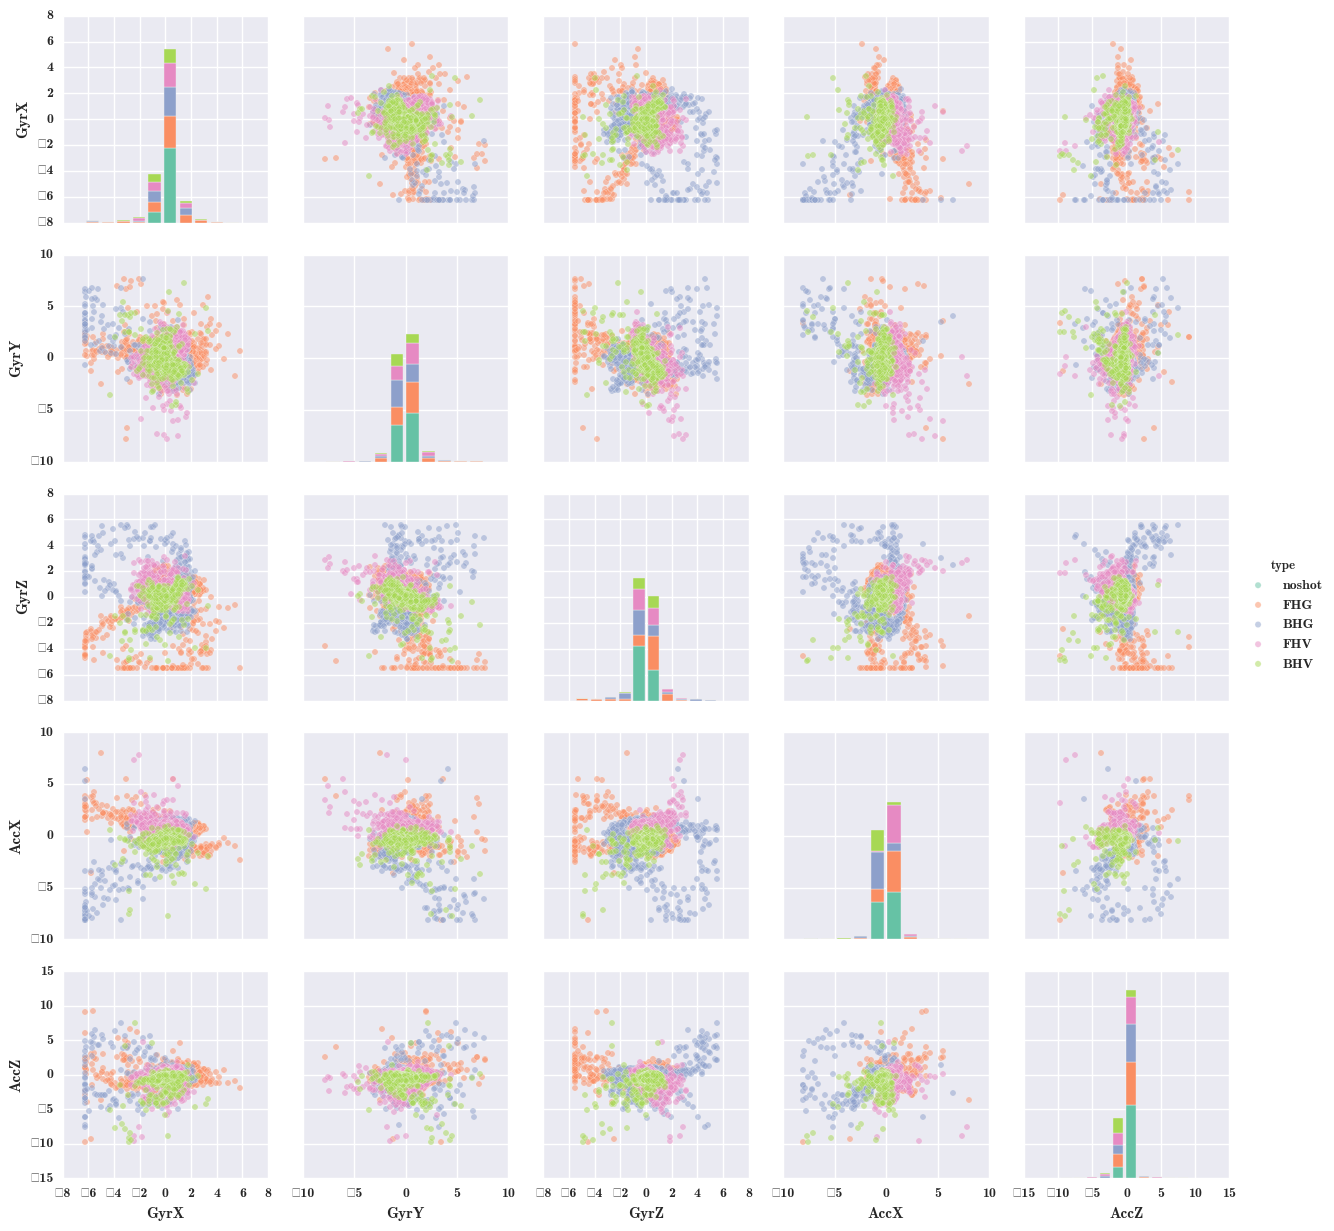

In [21]:
sns.set()
sns.pairplot(scaled_data.drop(['AccY'], axis=1), hue="type", plot_kws={'alpha':0.5}, palette='Set2')

In [22]:
scaled_data.to_csv('scaled_data_2017-04-16.csv')

In [23]:
combined_data.to_csv('combined_data_2017-04-16.csv')

In [39]:
combined_data_corr = combined_data.drop(['AccY'], axis=1).corr()

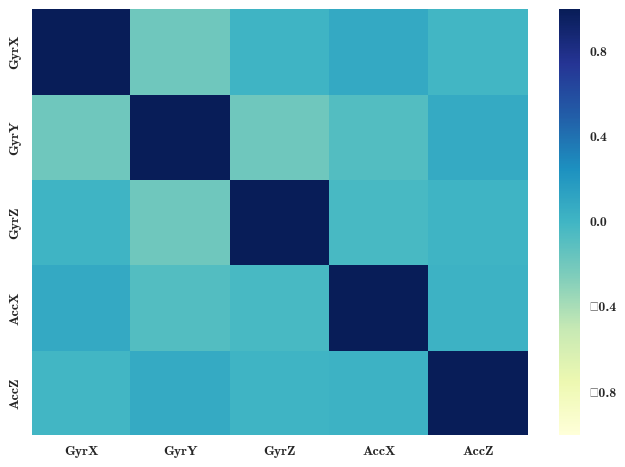

In [40]:
sns.heatmap(combined_data_corr, cmap="YlGnBu")

__Cleanup data__

In [9]:
#pd.tools.plotting.scatter_matrix(fhg_raw_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

__Work out signal energy__
SUM x^2

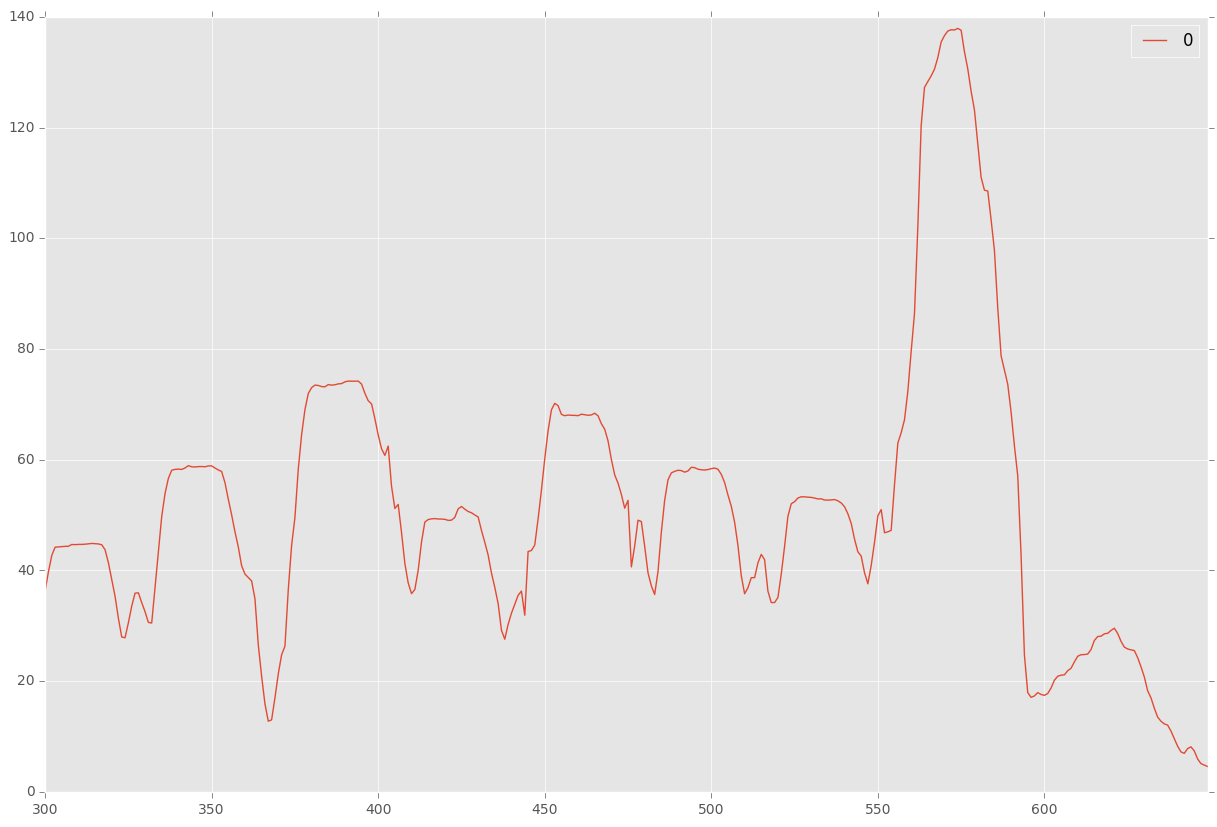

In [19]:
buffer_length = 30

#print fhg_raw_data['GyrX'].size

def signal_nrj(input_sig):
    return sum(np.power(input_sig, 2))

nrj = np.zeros(1)

#print nrj.size

for p in range(1,fhg_raw_data['GyrX'].size-buffer_length):
    nrj = np.append(nrj,signal_nrj(fhg_raw_data[p:p+buffer_length+1]['GyrX']))

nrj = np.append(nrj,np.zeros(buffer_length))

#print nrj.size

pd.DataFrame(nrj)[300:650].plot(figsize=(15, 10))

__"Instantaneous Energy"__

/usr/lib/python2.7/dist-packages/matplotlib/transforms.py:656: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


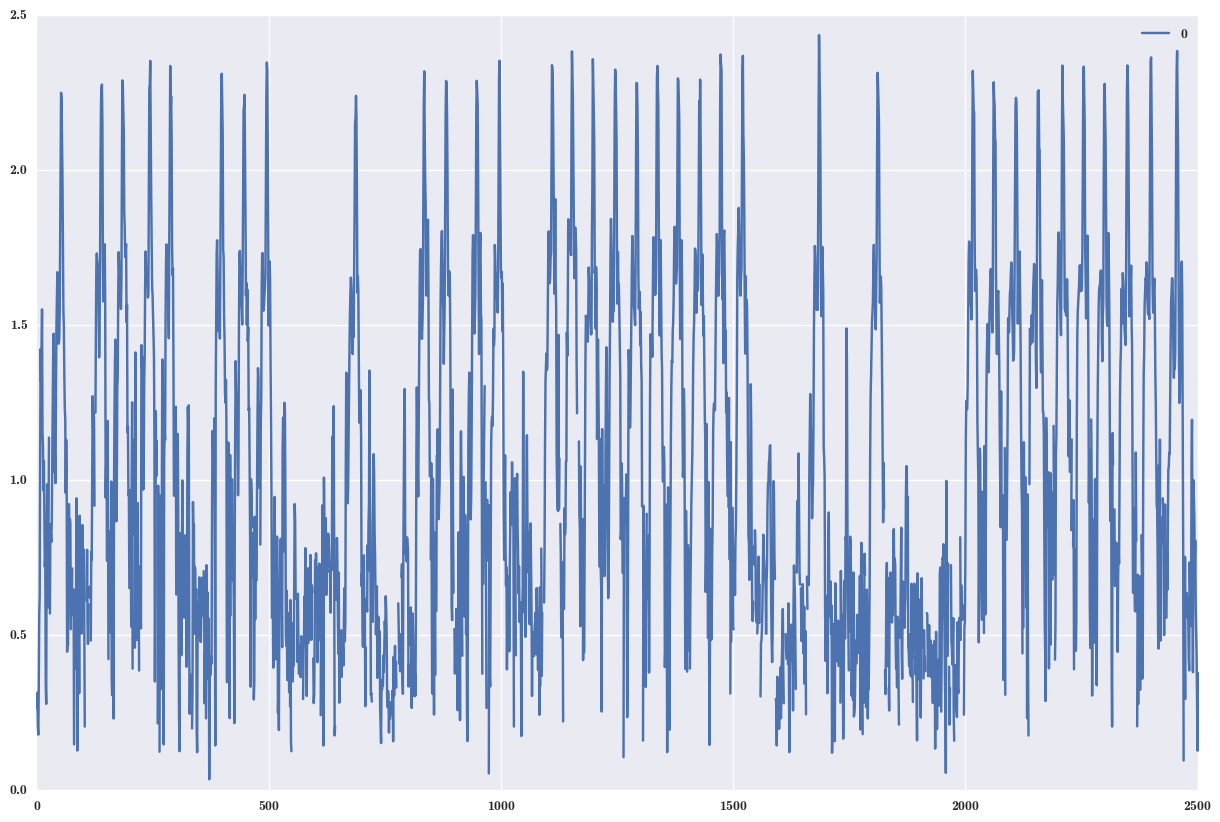

In [46]:
pd.DataFrame(inst_nrj(fhg_raw_data.drop(['t','type'], axis=1))).plot(figsize=(15, 10))

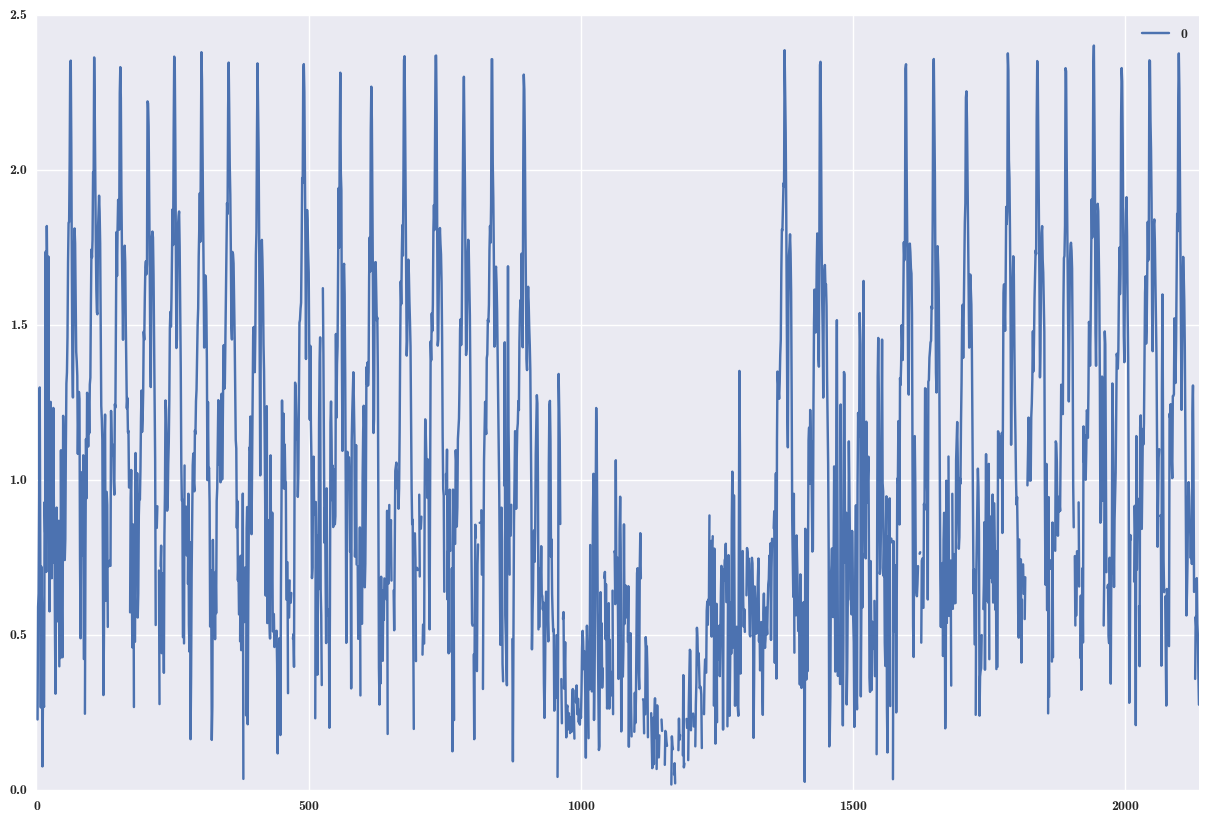

In [47]:
pd.DataFrame(inst_nrj(bhg_raw_data.drop(['t','type'], axis=1))).plot(figsize=(15, 10))

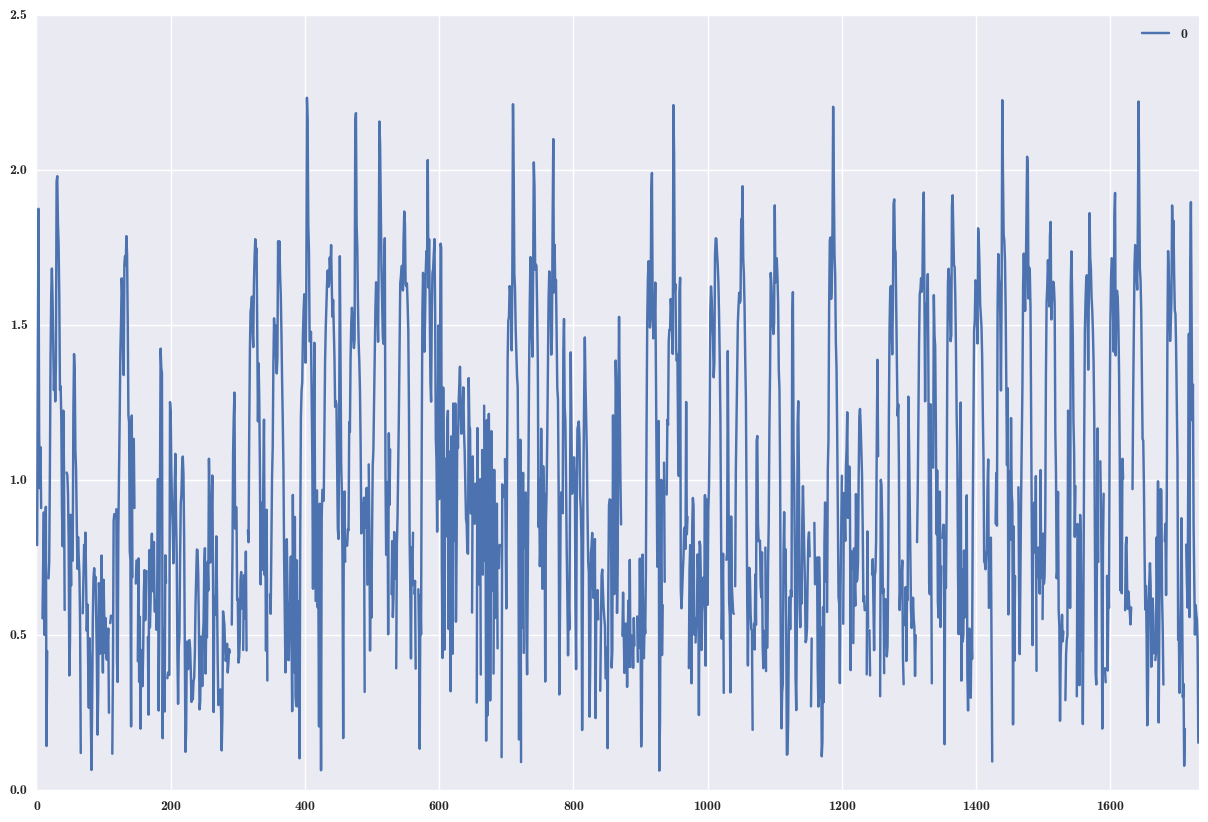

In [48]:
pd.DataFrame(inst_nrj(fhv_raw_data.drop(['t','type'], axis=1))).plot(figsize=(15, 10))

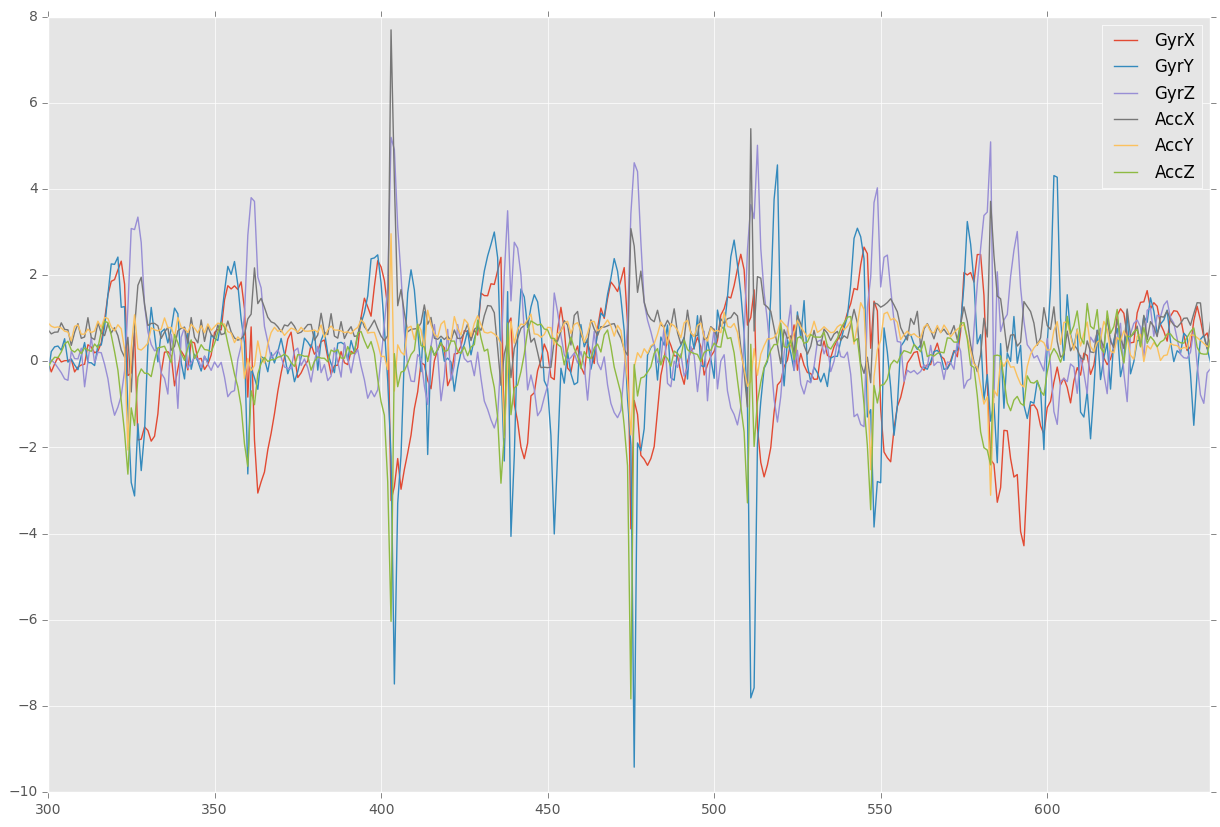

In [17]:
fhg_raw_data[300:650].plot(figsize=(15, 10))

In [4]:
fhg_data = fhg_raw_data[17:605]
fhg_data = fhg_data.reset_index(drop=True)

__For IDLE ONLY__

In [ ]:
def on_click(event):
    if event.inaxes is not None:
        print event.xdata

fig, ax = plt.subplots()
fhg_data.plot(ax=ax, figsize=(15, 10))
fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()

__Identify training data__

In [5]:
fhg_data['isShot'] = -1
training_coords = [6,36,42,72,86,115,132,163,177,209,221]
start_pos = 0
for c in training_coords:
    shot_val = training_coords.index(c) % 2
    fhg_data.ix[start_pos:c+1, 'isShot'] = shot_val
    start_pos = c+1

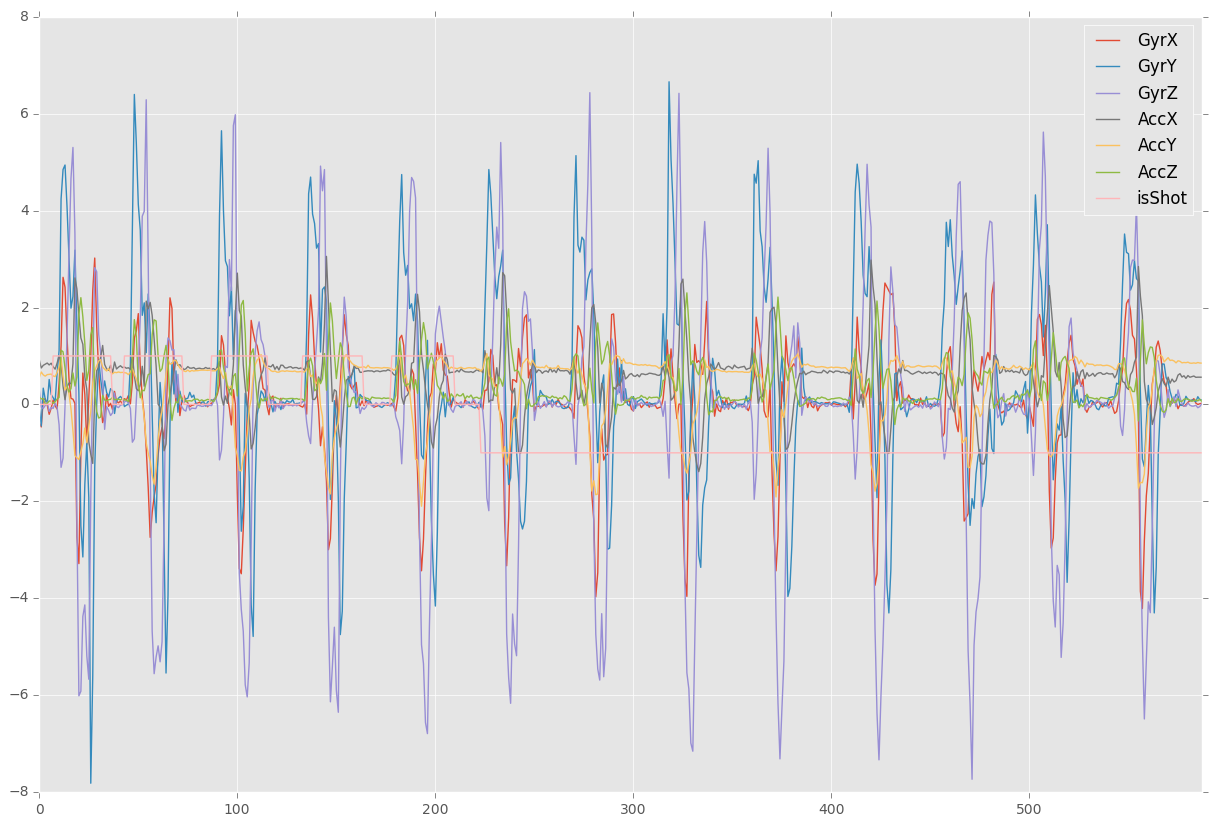

In [6]:
fhg_data.plot(figsize=(15, 10))

__FFT raw training signals__

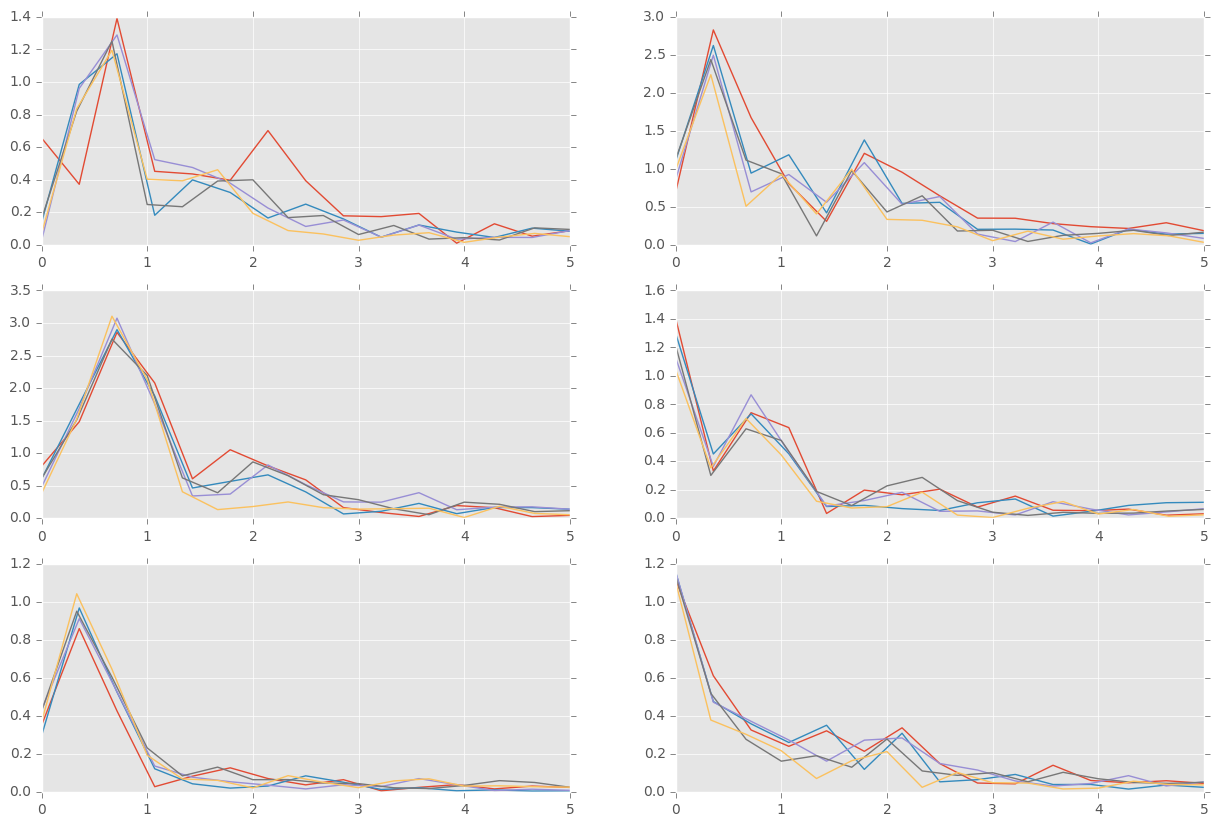

In [7]:
shot_windows = [(6,36),(42,72),(86,115),(132,163),(177,209)]
plt.figure(1,figsize=(15, 10))
sampling_rate = 1.0/10.0

for i in range(1,7):
    for c in shot_windows:
        imu_signal = fhg_data.iloc[c[0]:c[1]+1,i]
        N = len(imu_signal)
        yf = fft(imu_signal)
        xf = np.linspace(0.0, 1.0/(2.0*sampling_rate), N/2)
        plt.subplot(3, 2, i)
        plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))

plt.show()

__Filtering raw training signals__

In [129]:
#N, Wn = signal.buttord([0.25, 3], [0.05, 4.0], 0.001, 20.0)
#b, a = signal.butter(N, Wn, 'bandpass', True)
b, a = signal.butter(5, 0.5/5.0, 'highpass', True)

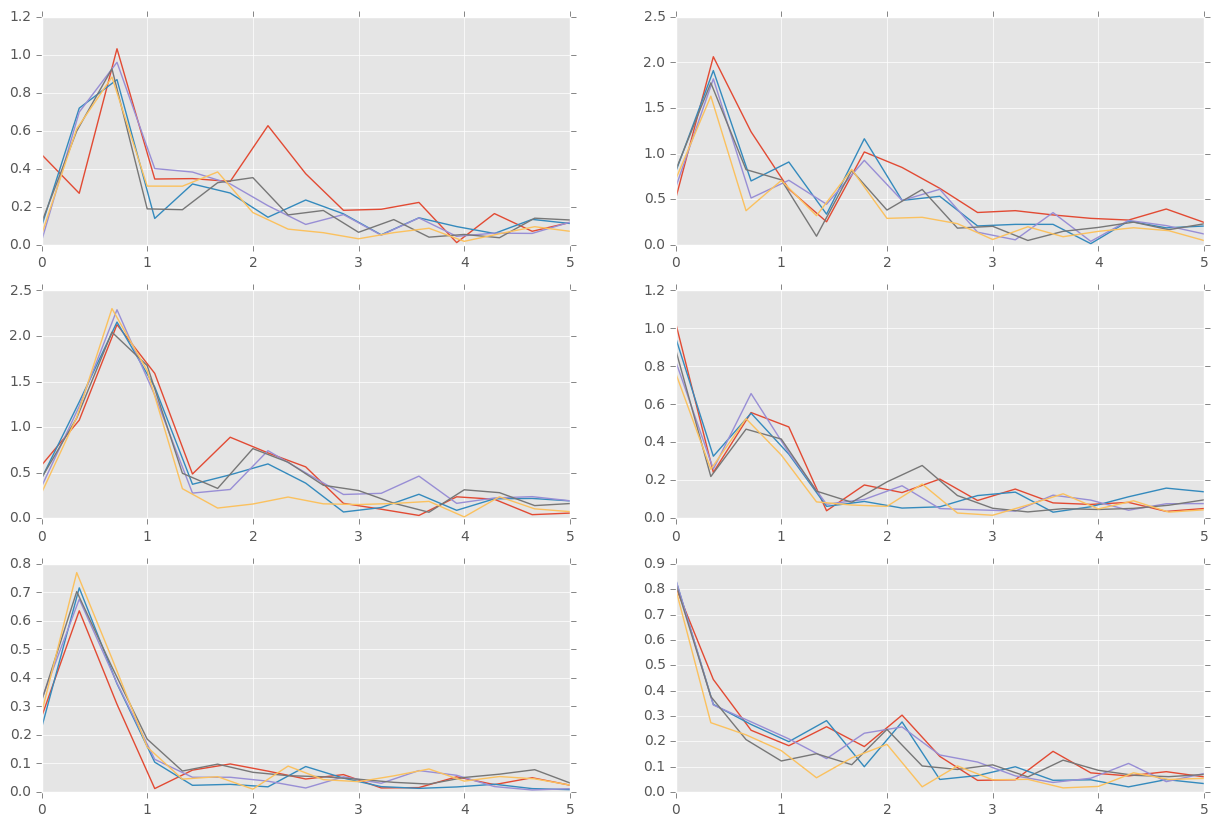

In [130]:
plt.figure(2,figsize=(15, 10))
for i in range(1,7):
    for c in shot_windows:
        imu_signal_flt = signal.lfilter(b, a, fhg_data.iloc[c[0]:c[1]+1,i])
        N = len(imu_signal_flt)
        yf = fft(imu_signal_flt)
        xf = np.linspace(0.0, 1.0/(2.0*sampling_rate), N/2)
        plt.subplot(3, 2, i)
        plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))

plt.show()

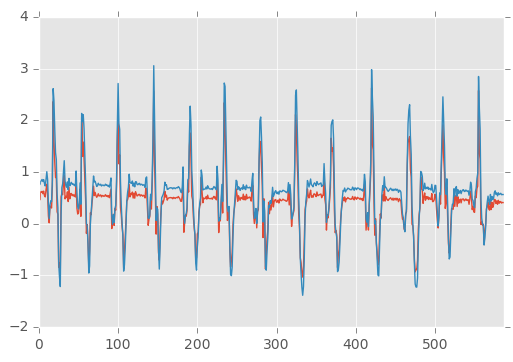

In [131]:
fhg_data['AccX_flt'] = signal.lfilter(b, a, fhg_data['AccX'])
fhg_data['AccX_flt'].plot()
fhg_data['AccX'].plot()